In [5]:
#load_libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
library(testthat)
library(digest)
library(cowplot)

options(repr.matrix.max.rows = 6)

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3      ✔ yardstick 0.0.7 

Warning message:
“package ‘broom’ was built under R version 4.0.2”
Warning message:
“package ‘dials’ was built under R version 4.0.2”
Warning message:
“package ‘infer’ was built under R version 4.0.3”
Warning message:
“package ‘modeldata’ was built under R version 4.0.1”
Warning message:
“package ‘parsnip’ was built under R version 4.0.2”
Warning message:
“package ‘recipes’ was built under R version 4.0.1”
Warning message:
“package ‘tune’ was built under R version 4.0.2”
Warning message:
“package ‘workflows’ was built under R version 4.0.2”
Warning message:
“package ‘yardstick’ was built under R version 4.0.2”
── Conflicts ────

In [2]:
#read_data 
cleavland_heart_disease_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", 
    col_names= c("Age", "Sex", "chest_pain_type", "resting_blood_pressure", "serum_cholestoral", "fasting_blood_sugar", "resting_electrocardiographic_results",
                "maximum_heart_rate" , "exercise_induced_angina" , "oldpeak" , "slope" , "ca" , "thal" , "POHD"))
cleavland_heart_disease_data

Parsed with column specification:
cols(
  Age = col_double(),
  Sex = col_double(),
  chest_pain_type = col_double(),
  resting_blood_pressure = col_double(),
  serum_cholestoral = col_double(),
  fasting_blood_sugar = col_double(),
  resting_electrocardiographic_results = col_double(),
  maximum_heart_rate = col_double(),
  exercise_induced_angina = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  POHD = col_double()
)



Age,Sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,ca,thal,POHD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [68]:
#select for desired coloumns
heart_disease_data <- cleavland_heart_disease_data %>%
                    select(Age, chest_pain_type, serum_cholestoral, POHD) %>%
                    mutate(POHD = as_factor(POHD))
heart_disease_data

Age,chest_pain_type,serum_cholestoral,POHD
<dbl>,<dbl>,<dbl>,<fct>
63,1,233,0
67,4,286,2
67,4,229,1
⋮,⋮,⋮,⋮
57,4,131,3
57,2,236,1
38,3,175,0


In [69]:
#seperate into training and testing data
set.seed(1234)
heart_disease_split <- initial_split(heart_disease_data, prop = 0.70, strata = POHD)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

heart_disease_train
heart_disease_test

Age,chest_pain_type,serum_cholestoral,POHD
<dbl>,<dbl>,<dbl>,<fct>
63,1,233,0
67,4,229,1
62,4,268,3
⋮,⋮,⋮,⋮
57,4,131,3
57,2,236,1
38,3,175,0


Age,chest_pain_type,serum_cholestoral,POHD
<dbl>,<dbl>,<dbl>,<fct>
67,4,286,2
37,3,250,0
41,2,204,0
⋮,⋮,⋮,⋮
67,3,212,1
63,4,197,1
59,4,176,3


In [70]:
#scaled Data 
heart_diease_recipe <- recipe(POHD ~ Age + serum_cholestoral , data = heart_disease_train ) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) 
heart_diease_scaled <- heart_diease_recipe %>%
        prep() %>%
        bake(heart_disease_train) 



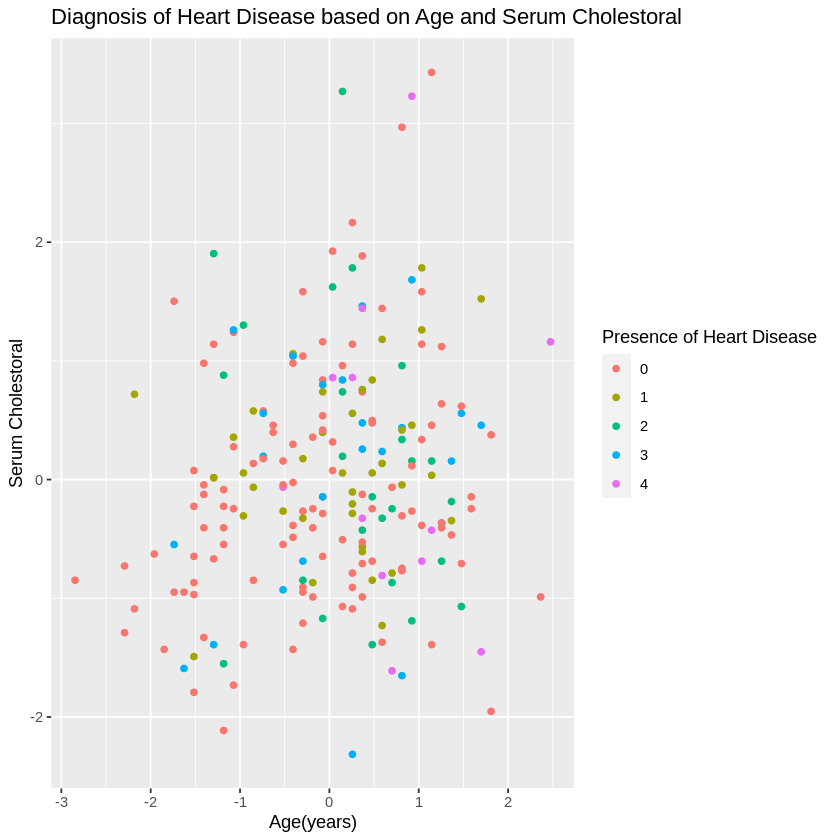

In [71]:
plot_1 <- heart_diease_scaled %>%
    ggplot (aes(x=Age, y=serum_cholestoral, colour= POHD)) +
    geom_point() +
    labs(x= "Age(years)", y= "Serum Cholestoral", colour = "Presence of Heart Disease") +
    ggtitle("Diagnosis of Heart Disease based on Age and Serum Cholestoral" )

plot_1